In [136]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OrdinalEncoder
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestClassifier
import torch
import torch.nn as nn
import math, time, pickle


In [2]:
df = pd.read_csv("./data/seattle-weather.csv")
df = df.sort_values('date')
df.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [3]:
nans = df.isnull().sum()
print(f"Number of columns with NaNs: {len(nans[nans > 0])}")
print(f"Weather Outcomes: {df['weather'].unique()}")
print(f"Outcome Distribution: \n{df['weather'].value_counts()}")

Number of columns with NaNs: 0
Weather Outcomes: ['drizzle' 'rain' 'sun' 'snow' 'fog']
Outcome Distribution: 
weather
rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: count, dtype: int64


In [6]:
# Now calculate the correlation matrix
corr = df.corr(numeric_only = True)
print(corr)

# plt.figure(figsize =(15, 12))
# sns.heatmap(corr)
# plt.show()

               precipitation  temp_max  temp_min      wind
precipitation       1.000000 -0.228555 -0.072684  0.328045
temp_max           -0.228555  1.000000  0.875687 -0.164857
temp_min           -0.072684  0.875687  1.000000 -0.074185
wind                0.328045 -0.164857 -0.074185  1.000000


In [7]:
df['precipitation'].describe()

count    1461.000000
mean        3.029432
std         6.680194
min         0.000000
25%         0.000000
50%         0.000000
75%         2.800000
max        55.900000
Name: precipitation, dtype: float64

In [8]:
df['temp_min'].describe()

count    1461.000000
mean        8.234771
std         5.023004
min        -7.100000
25%         4.400000
50%         8.300000
75%        12.200000
max        18.300000
Name: temp_min, dtype: float64

In [9]:
df['temp_max'].describe()

count    1461.000000
mean       16.439083
std         7.349758
min        -1.600000
25%        10.600000
50%        15.600000
75%        22.200000
max        35.600000
Name: temp_max, dtype: float64

In [10]:
df['wind'].describe()

count    1461.000000
mean        3.241136
std         1.437825
min         0.400000
25%         2.200000
50%         3.000000
75%         4.000000
max         9.500000
Name: wind, dtype: float64

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(df['temp_max'], label = 'Temp Max')
plt.plot(df['temp_min'], label = 'Temp Min')
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.title("Historical Temperature",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Temperature (C)',fontsize=18)
plt.legend()
plt.show()

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(df['precipitation'])
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.title("Historical Precipitation",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Precipitation (mm)',fontsize=18)
plt.show()

In [ ]:
sns.set_style("darkgrid")
plt.figure(figsize = (15,9))
plt.plot(df['wind'])
plt.xticks(range(0,df.shape[0],500),df['date'].loc[::500],rotation=45)
plt.title("Historical Wind",fontsize=18, fontweight='bold')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Wind (m/s)',fontsize=18)
plt.show()

In [14]:
# Target variable and train set
oe = OrdinalEncoder()
oe.fit(df[['weather']])
df['weather_ordinal'] = oe.transform(df[['weather']])

y = df['weather_ordinal'].copy()
X = df.copy().drop('weather_ordinal', axis = 1)
X = X.drop('weather', axis = 1)
X = X.drop('date', axis = 1)

# Create and fit MinMaxScaler
mmscaler = MinMaxScaler()
sc = mmscaler.fit(X)

# Scale input features
X = sc.transform(X)

# Split test and train data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(1168, 4) (293, 4)
(1168,) (293,)


In [15]:
for n in range(10, 105, 5):
    r = RandomForestClassifier(n_estimators = n, random_state = 42)
    r.fit(X_train, y_train)
    train_score = r.score(X_train, y_train)
    test_score = r.score(X_test, y_test)
    print(f"n_estimators = {n}, Train accuracy = {train_score}, Test accuracy = {test_score}")

n_estimators = 10, Train accuracy = 0.9914383561643836, Test accuracy = 0.78839590443686
n_estimators = 15, Train accuracy = 0.9914383561643836, Test accuracy = 0.8156996587030717
n_estimators = 20, Train accuracy = 0.9931506849315068, Test accuracy = 0.8156996587030717
n_estimators = 25, Train accuracy = 0.9931506849315068, Test accuracy = 0.825938566552901
n_estimators = 30, Train accuracy = 0.9948630136986302, Test accuracy = 0.8191126279863481
n_estimators = 35, Train accuracy = 0.9965753424657534, Test accuracy = 0.825938566552901
n_estimators = 40, Train accuracy = 0.9957191780821918, Test accuracy = 0.8191126279863481
n_estimators = 45, Train accuracy = 0.9965753424657534, Test accuracy = 0.8293515358361775
n_estimators = 50, Train accuracy = 0.9965753424657534, Test accuracy = 0.8225255972696246
n_estimators = 55, Train accuracy = 0.9965753424657534, Test accuracy = 0.8225255972696246
n_estimators = 60, Train accuracy = 0.9965753424657534, Test accuracy = 0.825938566552901
n_es

In [16]:
# Random Forest
rfc = RandomForestClassifier(n_estimators = 45, random_state = 42)
rfc.fit(X_train, y_train)
print(f"Train score is: {rfc.score(X_train, y_train)}")
print(f"Test score is: {rfc.score(X_test, y_test)}")

Train score is: 0.9965753424657534
Test score is: 0.8293515358361775


In [17]:
# These values are close to the prediction for rain
X_new = [[0.06, 0.6, 0.94, 0.1]]
y_new = [rfc.predict(X_new)]
print(X_new[0])
print(y_new[0])
print(oe.inverse_transform(y_new)[0])

[0.06, 0.6, 0.94, 0.1]
[2.]
['rain']


In [18]:
# Create lookup for weather
images = {'drizzle': 'assets/drizzle.png', 'rain': 'assets/rain.png', 'sun': 'assets/sun.png', 'snow': 'assets/snow.png', 'fog': 'assets/fog.png'}

In [19]:
# Save Model
model_file = open('weather_prediction_model.pkl', 'wb')
pickle.dump(rfc, model_file)
pickle.dump(oe, model_file)
pickle.dump(sc, model_file)
pickle.dump(images, model_file)
model_file.close()

In [9]:
# GRU Model Class
class GRU(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(GRU, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.gru = nn.GRU(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn) = self.gru(x, (h0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [10]:
def split_data(stock, lookback):
    data_raw = np.array(stock) # convert to numpy array
    data = []
    
    # create all possible sequences of length seq_len
    for index in range(len(data_raw) - lookback): 
        data.append(data_raw[index: index + lookback])
    
    data = np.array(data);
    test_set_size = int(np.round(0.2*data.shape[0]));
    train_set_size = data.shape[0] - (test_set_size);
    
    X_train = data[:train_set_size,:-1,:]
    y_train = data[:train_set_size,-1,:]
    
    X_test = data[train_set_size:,:-1]
    y_test = data[train_set_size:,-1,:]
    
    return [X_train, y_train, X_test, y_test]

In [146]:
precipitation = df['precipitation']
precip_scaler = MinMaxScaler(feature_range=(0, 1))
precipitation = precip_scaler.fit_transform(precipitation.values.reshape(-1,1))

In [23]:
temp_max = df['temp_max']
temp_max_scaler = MinMaxScaler(feature_range=(0, 1))
temp_max = temp_max_scaler.fit_transform(temp_max.values.reshape(-1,1))

In [24]:
temp_min = df['temp_min']
temp_min_scaler = MinMaxScaler(feature_range=(0, 1))
temp_min = temp_min_scaler.fit_transform(temp_min.values.reshape(-1,1))

In [25]:
wind = df['wind']
wind_scaler = MinMaxScaler(feature_range=(0, 1))
wind = wind_scaler.fit_transform(wind.values.reshape(-1,1))

In [158]:
lookback = 7 # choose sequence length
X_train, y_train, X_test, y_test = split_data(precipitation, lookback)
print('X_train.shape = ',X_train.shape)
print('y_train.shape = ',y_train.shape)
print('X_test.shape = ',X_test.shape)
print('y_test.shape = ',y_test.shape)

X_train.shape =  (1163, 6, 1)
y_train.shape =  (1163, 1)
X_test.shape =  (291, 6, 1)
y_test.shape =  (291, 1)


In [159]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train_gru = torch.from_numpy(y_train).type(torch.Tensor)
y_test_gru = torch.from_numpy(y_test).type(torch.Tensor)

In [160]:
input_dim = 1
hidden_dim = 32
num_layers = 4
output_dim = 1
num_epochs = 1000

GRU does not appear to model precipitation properly, may have to consider a different approach
- Verify if it works for other properties (i.e. Temperature and Wind)

In [161]:
model = GRU(input_dim = input_dim, hidden_dim = hidden_dim, output_dim = output_dim, num_layers = num_layers)
criterion = torch.nn.MSELoss(reduction = 'mean')
optimiser = torch.optim.Adam(model.parameters(), lr = 0.001)

In [162]:
hist = np.zeros(num_epochs)
start_time = time.time()
gru = []

for t in range(num_epochs):
    y_train_pred = model(X_train)

    loss = criterion(y_train_pred, y_train_gru)
    # print(f"Epoch {t}, MSE: {loss.item()}")
    hist[t] = loss.item()

    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

training_time = time.time() - start_time    
print(f"MSE: {hist[-1]}")
print(f"Training time: {training_time}")

MSE: 0.043952811509370804
Training time: 29.618263006210327


In [163]:
predict = pd.DataFrame(precip_scaler.inverse_transform(y_train_pred.detach().numpy()))
original = pd.DataFrame(precip_scaler.inverse_transform(y_train_gru.detach().numpy()))

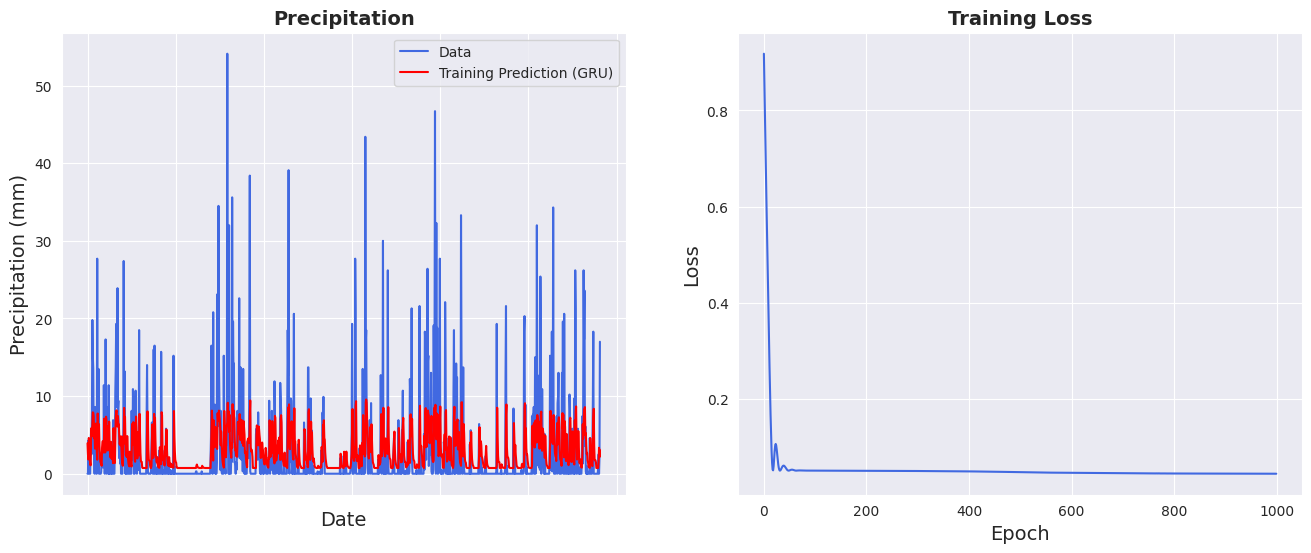

In [164]:
sns.set_style("darkgrid")    

fig = plt.figure()
fig.subplots_adjust(hspace=0.2, wspace=0.2)

plt.subplot(1, 2, 1)
ax = sns.lineplot(x = original.index, y = original[0], label="Data", color='royalblue')
ax = sns.lineplot(x = predict.index, y = predict[0], label="Training Prediction (GRU)", color='red')
ax.set_title('Precipitation', size = 14, fontweight='bold')
ax.set_xlabel("Date", size = 14)
ax.set_ylabel("Precipitation (mm)", size = 14)
ax.set_xticklabels('', size=10)

plt.subplot(1, 2, 2)
ax = sns.lineplot(data=hist, color='royalblue')
ax.set_xlabel("Epoch", size = 14)
ax.set_ylabel("Loss", size = 14)
ax.set_title("Training Loss", size = 14, fontweight='bold')
fig.set_figheight(6)
fig.set_figwidth(16)

In [165]:
# make predictions
y_test_pred = model(X_test)

# invert predictions
y_train_pred = precip_scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = precip_scaler.inverse_transform(y_train_gru.detach().numpy())
y_test_pred = precip_scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = precip_scaler.inverse_transform(y_test_gru.detach().numpy())

# calculate root mean squared error
trainScore = math.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print(f"Train MSE Score: {trainScore:.2f}")
testScore = math.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print(f"Test MSE Score: {testScore:.2f}")
gru.append(trainScore)
gru.append(testScore)
gru.append(training_time)

Train MSE Score: 5.86
Test MSE Score: 7.29


In [166]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(precipitation)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[lookback:len(y_train_pred)+lookback, :] = y_train_pred

# shift test predictions for plotting
testPredictPlot = np.empty_like(precipitation)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(y_train_pred)+lookback-1:len(precipitation)-1, :] = y_test_pred

original = precip_scaler.inverse_transform(precipitation.reshape(-1,1))

predictions = df.loc[:,'date'].to_numpy().reshape(-1,1)
predictions = np.append(predictions, trainPredictPlot, axis = 1)
predictions = np.append(predictions, testPredictPlot, axis = 1)
predictions = np.append(predictions, original, axis = 1)
result = pd.DataFrame(predictions, columns = ['Date', 'Train Prediction', 'Test Prediction', 'Actual Value'])

In [167]:
fig = go.Figure()
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result['Train Prediction'],
                    mode='lines',
                    name='Train Prediction')))
fig.add_trace(go.Scatter(x=result.index, y=result['Test Prediction'],
                    mode='lines',
                    name='Test Prediction'))
fig.add_trace(go.Scatter(go.Scatter(x=result.index, y=result['Actual Value'],
                    mode='lines',
                    name='Actual Value')))
fig.update_layout(
    xaxis=dict(
        showline=True,
        showgrid=True,
        showticklabels=False,
        linecolor='white',
        linewidth=1
    ),
    yaxis=dict(
        title_text='Precipitation (mm)',
        titlefont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
        showline=True,
        showgrid=True,
        showticklabels=True,
        linecolor='white',
        linewidth=1,
        ticks='outside',
        tickfont=dict(
            family='Rockwell',
            size=12,
            color='white',
        ),
    ),
    showlegend=True,
    template = 'plotly_dark'
)

annotations = []
annotations.append(dict(xref='paper', yref='paper', x=0.0, y=1.05,
                              xanchor='left', yanchor='bottom',
                              text='Precipitation Prediction',
                              font=dict(family='Rockwell',
                                        size=26,
                                        color='white'),
                              showarrow=False))
fig.update_layout(annotations=annotations)
fig.show()